## Importing libraries and loading data

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import zero_one_loss
from sklearn.neural_network import MLPRegressor

mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]
train_X = X[:8000]
train_y = y[:8000]
train_y = np.asarray(train_y, dtype=int)

test_X, test_y = X[8000:10000], y[8000:10000]
test_y = np.asarray(test_y, dtype=int)

## Making parameters for the random forest classifier

In [2]:
n_max = [10, 50, 100, 150]
n_max = np.array(n_max)
n_max = np.append(n_max, np.arange(200, 2001, 300))

n_tree = np.arange(5, 51, 5)

n_max_tree = []

for i in n_max:
    n_max_tree.append((i, 1))

for i in n_tree:
    n_max_tree.append((n_max[-1], i))

x_axis = []
for i in n_max_tree:
    x_axis.append(str(i[0]) + '/' + str(i[1]))
x_axis

['10/1',
 '50/1',
 '100/1',
 '150/1',
 '200/1',
 '500/1',
 '800/1',
 '1100/1',
 '1400/1',
 '1700/1',
 '2000/1',
 '2000/5',
 '2000/10',
 '2000/15',
 '2000/20',
 '2000/25',
 '2000/30',
 '2000/35',
 '2000/40',
 '2000/45',
 '2000/50']

## Random Forest Classifier

In [3]:
train_loss = []
test_loss = []

train_loss_zero_one = []
test_loss_zero_one = []

for n in n_max_tree:
    rf = RandomForestClassifier(n_estimators=n[1], max_leaf_nodes=n[0], max_depth=None, n_jobs=-1, bootstrap=False, max_features=None)
    rf.fit(train_X, train_y)
    train_pred = rf.predict(train_X)
    test_pred = rf.predict(test_X)
    train_loss.append(mean_squared_error(train_y, train_pred))
    test_loss.append(mean_squared_error(test_y, test_pred))
    train_loss_zero_one.append(zero_one_loss(train_y, train_pred))
    test_loss_zero_one.append(zero_one_loss(test_y, test_pred))

## Plotting results from Random Forest Classifier

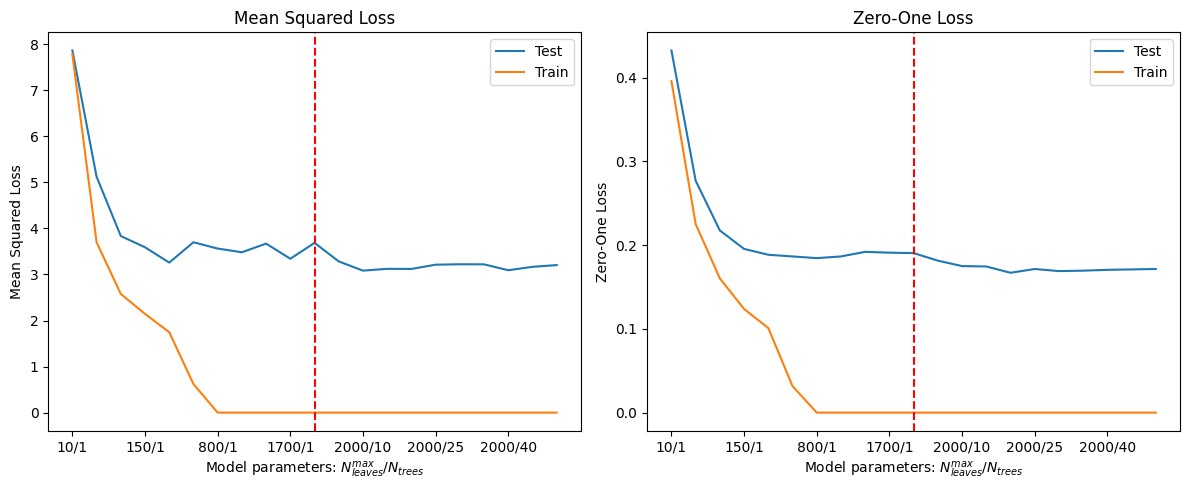

In [4]:
one_tree = [i for i in n_max_tree if i[1] == 1]
i_line = len(one_tree)-1

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(x_axis, test_loss, label="Test")
axes[0].plot(x_axis, train_loss, label="Train")
axes[0].legend()
axes[0].set_xlabel("Model parameters: " + r"$N^{max}_{leaves}/N_{trees}$")
axes[0].set_ylabel("Mean Squared Loss")
tick_positions = range(0, len(x_axis), 3)
axes[0].set_xticks(tick_positions)
axes[0].set_xticklabels([x_axis[i] for i in tick_positions])
axes[0].axvline(x=i_line, color='r', linestyle='--')
axes[0].set_title("Mean Squared Loss")

axes[1].plot(x_axis, test_loss_zero_one, label="Test")
axes[1].plot(x_axis, train_loss_zero_one, label="Train")
axes[1].legend()
axes[1].set_xlabel("Model parameters: " + r"$N^{max}_{leaves}/N_{trees}$")
axes[1].set_ylabel("Zero-One Loss")
axes[1].set_xticks(tick_positions)
axes[1].set_xticklabels([x_axis[i] for i in tick_positions])
axes[1].axvline(x=i_line, color='r', linestyle='--')
axes[1].set_title("Zero-One Loss")

plt.tight_layout()
plt.show()